In [ ]:
%load_ext autoreload
%autoreload 2

# Clase Tutorial 11: Reducción de dimensionalidad

- El objetivo de esta clase es introducir el método de reducción de dimensionalidad no lineal t-Distributed Stochastic Neighbor Embedding (t-SNE).

- Es una técnica ampliamente utilizada en la visualización de datos de alta dimensión y en el análisis exploratorio.

## Manifold Learning

- En muchos conjuntos de datos de alta dimensión, hay una estructura de baja dimensión subyacente.

- Esta estructura se supone que es un *manifold* o *variedad curva*, lo que da lugar al problema de "manifold learning" o "reducción de dimensionalidad no lineal".

- Usamos métodos no paramétricos, es decir que no aprendemos un modelo genérico, sino que calculamos una representación (embedding) para cada punto en el conjunto de entrenamiento.
  
- Estos métodos <span style="color: indianred;">no generalizan bien a datos nuevos</span>, pero <span style="color: darkseagreen;">son más flexibles y fáciles de ajustar</span>.

- Util para aprendizaje no supervisado, visualización de datos, y como paso de preprocesamiento para aprendizaje supervisado.


### 🤔 ¿Qué es un "manifold"?

- Un *manifold* es un espacio topológico que es *localmente euclidiano*. Esto significa que en cada punto se parece a un espacio plano, aunque en general pueda ser curvo.

- Ejemplo típico: la superficie de la Tierra
    - Aunque es curva en 3D, en cada punto la Tierra parece plana (como un mapa local en 2D).

    <img style="display: block; margin-left: auto; margin-right: auto;" src="/home/linar/Desktop/ML/Clases/i302/Clases/11_Clase 11: Reducción de Dimensionalidad/img/globe.png">

- Formalmente, un manifold $X$ de $d$ dimensiones, es un espacio donde cada punto $x \in X$ tiene un vecindario topológicamente equivalente a un espacio euclidiano de $d$ dimensiones. 
    - A este espacio en cada punto se le llama __espacio tangente__ y se denota como $T_x = T_xX$.

    <img style="display: block; margin-left: auto; margin-right: auto;" src="/home/linar/Desktop/ML/Clases/i302/Clases/11_Clase 11: Reducción de Dimensionalidad/img/tangent_space.png">


### Enfoques del Manifold Learning

- Existen diversos algoritmos, cada uno con diferentes suposiciones sobre la naturaleza del manifold y distintas características computacionales.

- Se pueden categorizar de la siguiente forma:

    <img style="display: block; margin-left: auto; margin-right: auto;" src="/home/linar/Desktop/ML/Clases/i302/Clases/11_Clase 11: Reducción de Dimensionalidad/img/table201.png">

- Los métodos "no paramétricos" aprenden una representación (embedding) de baja dimensión $z_i$ para cada punto de datos $x_i$, sin aprender una función de mapeo que permita aplicar el modelo a puntos nuevos.

## Motivación

- La mayoría de los datasets exhiben relaciones no lineales entre las features, y los puntos de datos se encuentran en un espacio de alta dimensionalidad.

- Por lo tanto, buscamos una representación de baja dimensionalidad de estos datos de alta dimensionalidad que preserve la relación entre diferentes puntos en el espacio original para visualizar los datos y explorar su estructura inherente, como los clusters.

- Sin embargo, muchos métodos de reducción de dimensionalidad lineales, como PCA, y algoritmos clásicos de manifold embedding, como Isomap, no logran este objetivo.

🚀 <span style="color: indianred;">Objetivo: proyectar los datos de alta dimensionalidad a 2D/3D mientras preservamos las relaciones entre los puntos de datos (es decir, puntos similares permanecen similares y puntos distintos permanecen distintos).</span>

## Stochastic Neighbor Embedding (SNE)

- Los métodos anteriores de reducción de dimensionalidad no lineal asignan un punto de datos en el espacio de alta dimensionalidad a una posición fija en el espacio de baja dimensionalidad, pero esto a menudo no logra capturar correctamente algunos puntos ambiguos que podrían pertenecer a varios vecindarios locales.

- SNE busca capturar mejor la identidad de los vecindarios al considerar la probabilidad de que un punto sea vecino de todos los demás puntos.

- Formalmente, define una matriz de similitud de \( n \times n \), denominada \( P \), en el espacio de alta dimensionalidad, cuyos elementos son

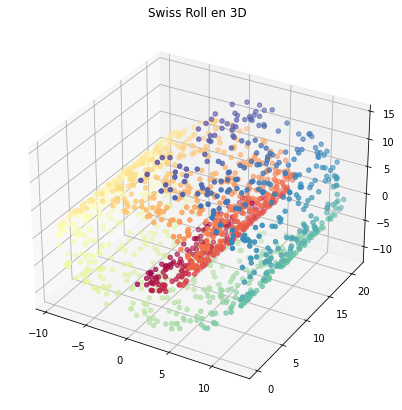

In [1]:
from sklearn.datasets import make_swiss_roll
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generamos datos Swiss Roll
n_samples = 1500
data, color = make_swiss_roll(n_samples=n_samples, noise=0.05)

# Visualizamos en 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=color, cmap=plt.cm.Spectral)
ax.set_title("Swiss Roll en 3D")
plt.show()